<a href="https://colab.research.google.com/github/MateoUsme/Esp_Analitica/blob/main/Taller_3_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [595]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

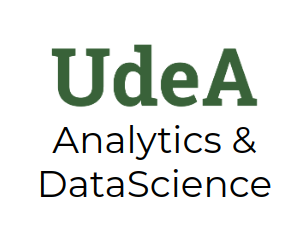

In [596]:
Image("local/imgs/udea-datascience.png")

# **Exploración de Datos - Taller 3**
## Universidad de Antioquia

### Estudiantes:

**Nombre Completo:** Camilo Gutiérrez Ramírez
**Cédula:** 1152460835
**Correo Institucional:** camilo.gutierrezr@udea.edu.co

**Nombre Completo:** Daniel Parra Holguin
**Cédula:** 1036676030
**Correo Institucional:** daniel.parrah1@udea.edu.co

**Nombre Completo:** Mateo Usme Valencia
**Cédula:** 1017264083
**Correo Institucional:** mateo.usmev@udea.edu.co

## Leer una base de datos

Para este taller utilizaremos un conjunto de datos del mundo real; este corresponde a un análisis de manuscritos antiguos de la Biblia, en el cual se ha identificado la participación de 12 copistas diferentes.
Dichos datos ya se han normalizado, utilizando el metodo de normalización Z. Revise la información adicional y la descripción del dataset disponble en: https://archive.ics.uci.edu/ml/datasets/Avila

**Sin embargo, no utilizaremos los archivos originales del repositorio, sino unas versiones modificadas (con fines prácticos para el taller) que estarán disponibles para el desarrollo del taller: *avila-tr-modified.csv* y *avila-ts-modified.csv***


In [597]:
!pip -q install sweetviz

import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as svz
import scipy.stats as sts
import scipy.special as spcl
import matplotlib.pyplot as plt

In [598]:
avila_tr_mod_url = "https://drive.google.com/uc?export=download&id=1cHJuI7eZyE6hU1EvLu3xKQ3UgBBGDTry"
avila_ts_mod_url = "https://drive.google.com/uc?export=download&id=1BUOi1v7dGv0Jx4ZM5WstxT6awfz-acCs"

In [599]:
data_tr = pd.read_excel(avila_tr_mod_url)
data_tr

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,NaN,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,NaN,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F
...,...,...,...,...,...,...,...,...,...,...,...
10425,0.080916,0.588093,0.015130,0.002250,0.261718,-0.557133,0.371178,0.932346,0.282354,-0.580141,F
10426,0.253730,-0.338346,0.352988,-1.154243,0.172340,-0.557133,0.257927,0.348428,0.032902,-0.527134,F
10427,0.229043,NaN,0.171611,-0.002793,0.261718,0.688613,0.295677,-1.088486,-0.590727,0.580142,A
10428,-0.301743,0.352558,0.288973,1.638181,0.261718,0.688613,0.069175,0.502761,0.625350,0.718969,E


In [600]:
data_ts = pd.read_excel(avila_ts_mod_url)
data_ts

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,-3.498799,0.250492,0.232070,1.224178,-4.922215,1.145386,0.182426,-0.165983,-0.123005,1.087144,W
1,0.204355,-0.354049,0.320980,0.410166,-0.989576,-2.218127,0.220177,0.181844,2.090879,-2.009758,A
2,0.759828,-1.304042,NaN,-0.973663,-0.006417,-0.349509,-0.421580,-0.450127,0.469443,0.060952,I
3,-0.005490,0.360409,0.281860,-0.213479,-1.168333,-1.013906,-0.346080,1.176165,0.968347,-0.627999,E
4,0.080916,0.101320,0.104040,0.140490,0.261718,0.480988,0.710932,-0.253430,-0.497183,0.155681,A
...,...,...,...,...,...,...,...,...,...,...,...
10432,-0.128929,-0.040001,0.057807,0.557894,0.261718,-0.930856,NaN,1.158458,2.277968,-0.699884,X
10433,0.266074,0.556689,-0.020434,NaN,0.261718,-0.515608,0.597681,0.178349,0.625350,-0.657245,G
10434,-0.054866,NaN,0.032912,-0.016668,0.261718,1.519109,0.371178,-0.985508,-0.403638,1.276301,A
10435,0.080916,0.588093,0.015130,0.002250,0.261718,-0.930856,-0.270579,0.163807,-0.091823,-0.593329,F


## Exploración de Datos Inicial

Una vez cargado los archivos avila_tr_modified.xlsx y avila_ts_modified.xlsx,  realice una breve exploración de ambas bases de datos.

¿Hay datos nulos o faltantes? ¿Cuál es el porcentaje de datos nulos o faltantes?

In [601]:
data_tr.isna().sum().to_frame("Datos nulos")

,Datos nulos
F1 intercolumnar distance,538
F2 upper margin,536
F3 lower margin,509
F4 exploitation,507
F5 row number,516
F6 modular ratio,504
F7 interlinear spacing,490
F8 weight,565
F9 peak number,514
F10 modular ratio/interlinear spacing,536


In [602]:
data_ts.isna().sum().to_frame("Datos nulos")

,Datos nulos
F1 intercolumnar distance,545
F2 upper margin,500
F3 lower margin,531
F4 exploitation,504
F5 row number,531
F6 modular ratio,521
F7 interlinear spacing,507
F8 weight,524
F9 peak number,525
F10 modular ratio/interlinear spacing,530


En la exploración inicial encontramos datos nulos en todas las columnas, desde *F1* hasta *F10* a excepción de la columna categórica *clases* donde se encuentran etiquetados los **12 copistas en el dataset**.

Utilizamos de *sklearn* el módulo *MissingIndicator* para corroborar las columnas con datos faltantes y también calcular el porcentaje de datos faltantes.

In [603]:
from sklearn.impute import MissingIndicator
import numpy as np

valores_faltantes_tr = MissingIndicator(missing_values = np.nan) 
valores_faltantes_tr.fit(data_tr)
total_vf_tr = valores_faltantes_tr.transform(data_tr)

valores_faltantes_ts = MissingIndicator(missing_values = np.nan) 
valores_faltantes_ts.fit(data_ts)
total_vf_ts = valores_faltantes_ts.transform(data_ts)

print(valores_faltantes_tr.features_, valores_faltantes_tr.features_)

[0 1 2 3 4 5 6 7 8 9] [0 1 2 3 4 5 6 7 8 9]


In [604]:
print("Porcentaje de Datos Faltantes en data_tr (%): ",100*(len(np.where(total_vf_tr == True)[0])/(data_tr.shape[0]*data_tr.shape[1])))
print("Porcentaje de Datos Faltantes en data_ts (%): ",100*(len(np.where(total_vf_ts == True)[0])/(data_ts.shape[0]*data_ts.shape[1])))

Porcentaje de Datos Faltantes en data_tr (%):  4.545454545454546
Porcentaje de Datos Faltantes en data_ts (%):  4.545019031940561


El porcentaje de datos faltantes en este dataset es bajo, permite tener libertad a la hora de tratar con ellos al tener una gran mayoría de datos en las demás filas a disposición para rellenar con estadísticos u otros métodos.

## Exploración de Datos Exhaustiva



Realice una exploración exhaustiva de la base de datos y responda las siguientes preguntas:

¿Cuales columnas tienen datos faltantes?

Presente y calcule el porcentaje de los datos faltantes contenidos en nuestra base de datos.


In [605]:
def get_categories(df, limite=20):

    cols_disponibles = df.columns[~df.applymap(
        lambda x: isinstance(x, list)).all(axis=0)]
    columnas_descartadas = df.columns[~df.columns.isin(cols_disponibles)]
    print('Columnas multiselect:', columnas_descartadas.to_list())
    for col in columnas_descartadas:
        print(f'\nColumna {col} - Tipo Multiselct con opciones:')
        print(' | '.join(df[col].explode().dropna().unique()))
    df_unicos = df.apply(lambda s: s.explode().dropna().unique().shape).T.set_axis(
        ['unicos'], axis=1)
    df_categories = df.apply(lambda x: " | ".join(map(
        str, x.explode().dropna().unique())) if x.explode().dropna().unique().shape[0] < limite else '-', axis=0).to_frame('categorias')
    df_faltantes = df.apply(
        lambda s: s.isnull()).sum().to_frame('faltantes')
    df_conteo = df.count().to_frame('num_datos')
    df_tipo = df.dtypes.to_frame('tipo')
    df_pct = (df.isnull().mean()*100).round(1).to_frame('% faltante')
    return pd.concat([df_categories, df_unicos, df_conteo, df_faltantes, df_pct, df_tipo], axis=1)

In [606]:
get_categories(data_tr)

Columnas multiselect: []


,categorias,unicos,num_datos,faltantes,% faltante,tipo
F1 intercolumnar distance,-,144,9892,538,5.2,float64
F2 upper margin,-,208,9894,536,5.1,float64
F3 lower margin,-,231,9921,509,4.9,float64
F4 exploitation,-,750,9923,507,4.9,float64
F5 row number,-,48,9914,516,4.9,float64
F6 modular ratio,-,226,9926,504,4.8,float64
F7 interlinear spacing,-,228,9940,490,4.7,float64
F8 weight,-,9575,9865,565,5.4,float64
F9 peak number,-,261,9916,514,4.9,float64
F10 modular ratio/interlinear spacing,-,9474,9894,536,5.1,float64


Como se realizó arriba, estas son las columnas que contienen datos faltantes y dichos datos en relación al total de información en el dataset representa solo un **4.54%**

Realizamos también una exploración a la variedad de valores dentro del dataset en donde se esperaba las columnas numéricas tuviesen variedad de valores al ser números racionales de tipo *float*, la columna clases contiene sus 12 etiquetas también.

In [607]:
data_tr.describe()

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing
count,9892.000000,9894.000000,9921.000000,9923.000000,9914.000000,9926.000000,9940.000000,9865.000000,9916.000000,9894.000000
mean,0.001546,0.036306,0.002634,-0.005310,0.007233,0.011181,0.004743,0.013899,0.013354,0.001993
std,0.987086,4.019557,1.124072,1.007372,0.992470,1.132249,1.328194,1.002868,1.093308,1.002932
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.542563,0.172340,-0.598658,-0.044076,-0.537749,-0.372457,-0.516878
50%,0.043885,-0.055704,0.217845,0.089437,0.261718,-0.058835,0.220177,0.116084,0.064084,-0.036816
75%,0.204355,0.203385,0.352988,0.655644,0.261718,0.564038,0.446679,0.654959,0.500624,0.533989
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


In [608]:
data_tr.clases.value_counts()

A    4286
F    1961
E    1095
I     831
X     522
H     519
G     446
D     352
Y     266
C     103
W      44
B       5
Name: clases, dtype: int64

In [609]:
data_ts.clases.value_counts()

A    4286
F    1962
E    1095
I     832
X     522
H     520
G     447
D     353
Y     267
C     103
W      45
B       5
Name: clases, dtype: int64

Realizando una exploración con estadísticos al dataset entero podemos encontrar que tienen valores muy atípicos tanto en los máximos como en los mínimos dando un abrebocas a lo que encontraremos más adelante cuando los tratemos.

## Imputación de Datos



De los métodos enseñados en clase, escoja el método de imputación de datos mas adecuado y justifique su elección. 

Primero guardaremos el dataframe sin la columna categórica pues la imputación de datos no dará como válido estos datos, se dejan solo los valores numéricos donde se contemplan los datos faltantes sin problema de que la columna categórica esté limpia de valores nulos o extraños.

In [610]:
data_tr = data_tr.sort_values(by="clases").reset_index(drop=True)
data_tr_2 = data_tr.loc[:,data_tr.columns[0]:data_tr.columns[-2]].copy()
columnas = data_tr_2.columns
col_clases = data_tr.clases
data_tr_2

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345
1,-0.128929,0.022808,0.192950,0.837775,0.261718,0.771662,0.220177,0.268534,0.095265,0.709807
2,0.216699,-2.089160,NaN,-0.457525,0.082961,1.062336,0.824183,0.224441,-0.029461,0.600937
3,-0.042522,-0.236281,-3.210528,-0.272051,0.261718,2.557230,0.597681,-0.908719,-0.278912,2.035883
4,-0.030178,0.093469,0.235627,1.206186,0.261718,0.605563,0.257927,0.460746,0.375899,0.535743
...,...,...,...,...,...,...,...,...,...,...
10425,-0.240024,-0.299090,0.694403,0.955725,0.619230,-0.432558,-0.723584,0.384075,2.246787,0.141805
10426,-0.128929,-0.283388,0.488131,0.833628,0.797987,-0.266459,-1.818346,0.334099,1.467250,1.089013
10427,0.117948,-0.165620,0.562816,0.567204,0.619230,-0.432558,-1.591843,-0.239936,-1.682078,0.747347
10428,-0.301743,-0.314793,0.399221,0.770520,0.708609,0.896237,-1.591843,-1.399172,-0.216549,2.116351


Elegimos el método de imputación basado en el algoritmo de **K-vecinos más cercanos** para tomar los valores más cercanos y realizar el promedio ponderado de estos con una mayor relevancia según más cerca estén del dato faltante.

Se ordenó el dataset anterior en orden alfabético según la categoría *clase*, tal categoría representa a los 12 copitas asignados por una letra, de esta forma al realizar el método de imputación elegido tomará los valores de los vecinos más cercanos que serán del mismo copista y realizará el promedio entre estos para asi evitar relacionar diferentes patrones de copistas entre estos datos.

In [611]:
from sklearn.impute import KNNImputer

knn_imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights= "uniform")  
knn_imp.fit(data_tr_2)
data_tr_2 = knn_imp.transform(data_tr_2)
print(data_tr_2.shape)

(10430, 10)


Las dimensiones corresponden con las del dataset original sin la columna de categorías, columnas de la F1 hasta la F10

In [612]:
data_tr = pd.concat([pd.DataFrame(data_tr_2,columns=columnas)]+[data_tr.clases],axis=1)
data_tr

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,-0.128929,0.022808,0.192950,0.837775,0.261718,0.771662,0.220177,0.268534,0.095265,0.709807,A
2,0.216699,-2.089160,-0.925895,-0.457525,0.082961,1.062336,0.824183,0.224441,-0.029461,0.600937,A
3,-0.042522,-0.236281,-3.210528,-0.272051,0.261718,2.557230,0.597681,-0.908719,-0.278912,2.035883,A
4,-0.030178,0.093469,0.235627,1.206186,0.261718,0.605563,0.257927,0.460746,0.375899,0.535743,A
...,...,...,...,...,...,...,...,...,...,...,...
10425,-0.240024,-0.299090,0.694403,0.955725,0.619230,-0.432558,-0.723584,0.384075,2.246787,0.141805,Y
10426,-0.128929,-0.283388,0.488131,0.833628,0.797987,-0.266459,-1.818346,0.334099,1.467250,1.089013,Y
10427,0.117948,-0.165620,0.562816,0.567204,0.619230,-0.432558,-1.591843,-0.239936,-1.682078,0.747347,Y
10428,-0.301743,-0.314793,0.399221,0.770520,0.708609,0.896237,-1.591843,-1.399172,-0.216549,2.116351,Y


In [613]:
get_categories(data_tr)

Columnas multiselect: []


,categorias,unicos,num_datos,faltantes,% faltante,tipo
F1 intercolumnar distance,-,593,10430,0,0.0,float64
F2 upper margin,-,691,10430,0,0.0,float64
F3 lower margin,-,699,10430,0,0.0,float64
F4 exploitation,-,1252,10430,0,0.0,float64
F5 row number,-,217,10430,0,0.0,float64
F6 modular ratio,-,649,10430,0,0.0,float64
F7 interlinear spacing,-,542,10430,0,0.0,float64
F8 weight,-,10139,10430,0,0.0,float64
F9 peak number,-,693,10430,0,0.0,float64
F10 modular ratio/interlinear spacing,-,10010,10430,0,0.0,float64


La imputación de datos no modificó el dataset a otras dimensiones y no quedó ningún valor nulo en las columnas que antes sí tenían.

## Detección de Datos Atípicos

Presente mediante graficos vistos a lo largo del curso, diagramas que permitan la visualización  de datos atípicos, de una breve explicación de lo mostrado y analice si dentro del contexto del problema se pueden eliminar, justifique. 

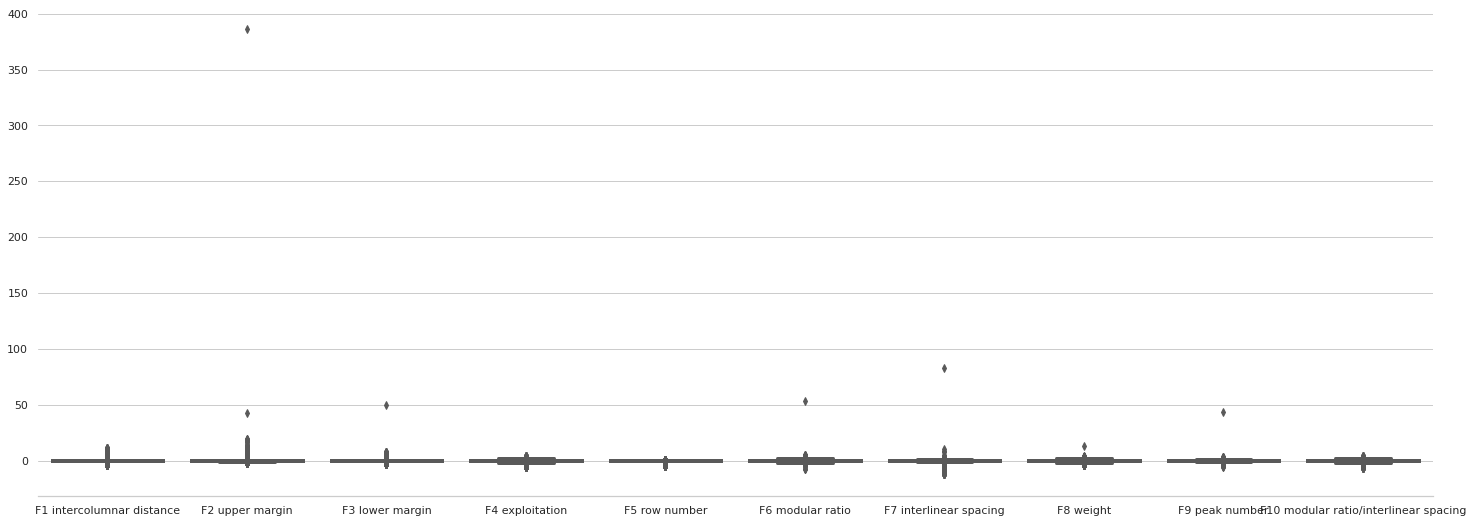

In [614]:
import seaborn as sns # Librería de visualización para data science

sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_tr, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [615]:
data_tr[data_tr["F2 upper margin"]>18]

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases
537,-3.498799,43.133656,-3.210528,0.473966,-4.832837,-7.450257,0.325878,13.173081,-5.486218,0.034259,A
1261,-3.498799,19.470188,0.256965,0.105669,-4.922215,-1.346105,0.031425,0.896952,-2.929337,-1.129131,A
2291,0.000000,386.000000,50.000000,0.168104,0.000000,53.000000,83.000000,0.275032,44.000000,0.638020,A
2566,-3.498799,19.470188,0.256965,0.105669,-4.922215,-0.723232,-0.006326,1.017949,-1.519935,-0.539165,A
2811,-3.498799,19.470188,0.256965,0.105669,-4.922215,-0.432558,0.484429,0.408926,-3.085245,-0.522843,A


Hay valores atípicos demasiado alejados de los otros valores, entramos a revisar uno de estos con la columna *F2 upper margin* y precisamente esa fila contiene los demás datos extrañamente raros de las otras columnas, por esto mismo podemos eliminar este registro sin problema pues es más sencillo que tratar de arreglar cada valor de cada columna para un solo registro.

In [616]:
data_tr = data_tr.drop(data_tr.loc[data_tr["F2 upper margin"]>20,"F2 upper margin"].index)

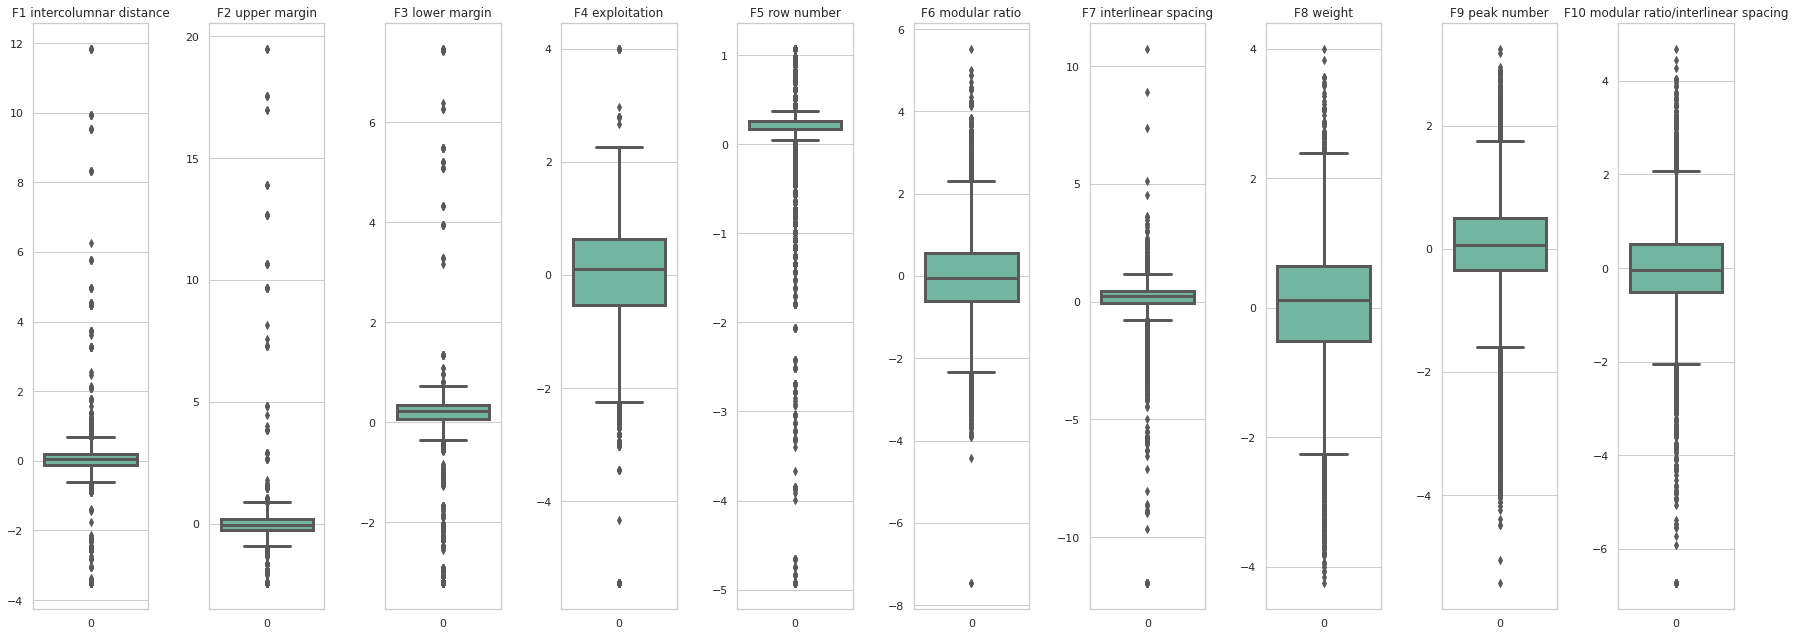

In [617]:
df_c = data_tr.loc[:,data_tr.columns[0]:data_tr.columns[-2]]
for i, column in enumerate(df_c.columns, 1):
  plt.subplot(1,len(df_c.columns),i)
  sns.boxplot(data = data_tr[column], linewidth = 3, palette="Set2", fliersize = 5)
  plt.title(column)
  plt.tight_layout()

Ya tenemos una visualización más acorde a lo que desearíamos para detallar los datos atípicos, es el caso de varias columnas que tienen aún muchos valores fuera del conjunto con mayor densidad dentro de la misma categoría.

No se pueden corregir todos los valores que estén por fuera de los extremos de los cuartiles en la gráfica de Boxplot porque no todos están tan dispersos aunque los que están en las colas superior e inferior sí serán tratados por la diferencia en magnitud principalmente.

In [618]:
data_tr["F2 upper margin"].quantile([0.25,0.75])

0.25   -0.259834
0.75    0.203385
Name: F2 upper margin, dtype: float64

In [619]:
for col in df_c.columns:
  a,b = data_tr[col].quantile([0.25,0.75])
  iqr = b-a
  if b > 0:
    upper = b+1.5*iqr
  else:
    upper = b-1.5*iqr

  if a > 0:
    lower = a-1.5*iqr
  else:
    lower = a+1.5*iqr

  print(upper, lower, a,b)
  data_tr.loc[data_tr[col]>upper,col] = upper
  data_tr.loc[data_tr[col]<lower, col] = lower

0.695023375 0.365442425 -0.128929 0.20065195
0.8982135000000001 0.43499450000000006 -0.259834 0.203385
0.7815355 -0.37074050000000003 0.061363 0.349432
2.3971395 1.2275485000000002 -0.526838 0.642753
0.39578500000000005 0.038272999999999974 0.17234 0.261718
2.3080819999999997 1.1453859999999998 -0.598658 0.564038
1.1828115 0.6920565 -0.044076 0.446679
2.39015775 1.2251942500000002 -0.522251 0.6427125
1.7634725 0.9215735 -0.341275 0.500624
2.0699172499999996 1.0386457499999997 -0.5082615 0.52301


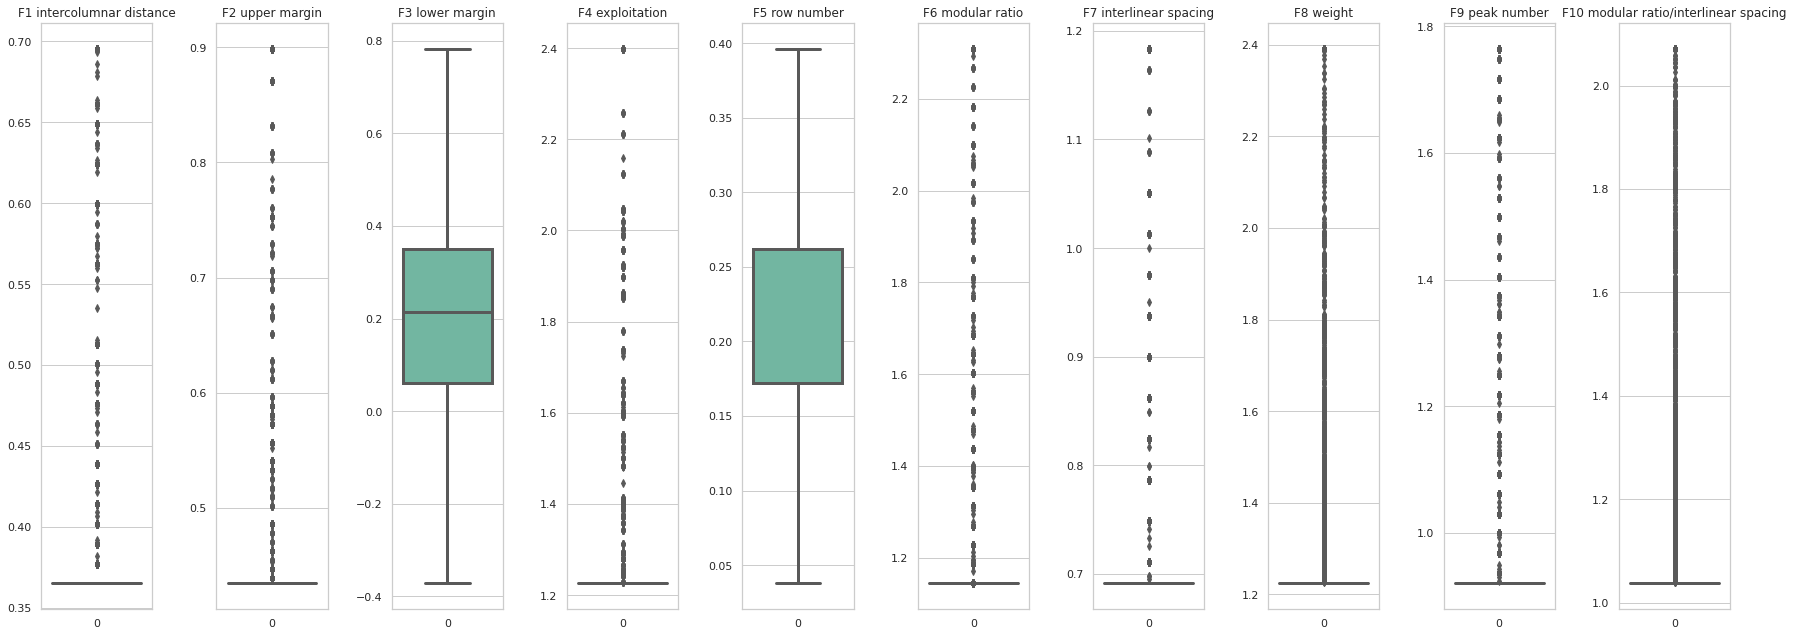

In [620]:
df_c = data_tr.loc[:,data_tr.columns[0]:data_tr.columns[-2]]
for i, column in enumerate(df_c.columns, 1):
  plt.subplot(1,len(df_c.columns),i)
  sns.boxplot(data = data_tr[column], linewidth = 3, palette="Set2", fliersize = 5)
  plt.title(column)
  plt.tight_layout()

Una vez corregido en su mayoría los valores muy atípicos y que por magnitud estaban alejados de lo que se esperaría, revisamos con un gráfico de diagrama de violín para observar cómo se distribuye la densidad de los datos en cada categoría.

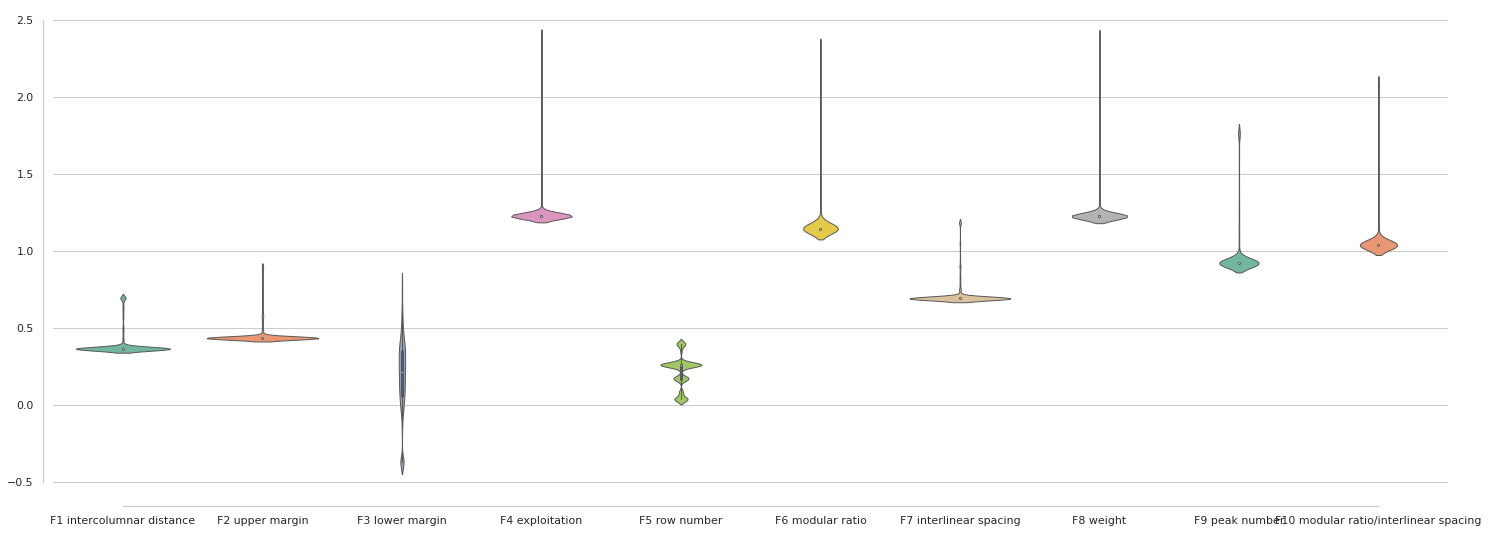

In [621]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.violinplot(data = data_tr, linewidth = 1, palette="Set2", fliersize = 2)
sns.despine(offset=10, trim=True);

La forma en la que estás distribuidos los datos para cada columna ahora están más uniformes si se compara con el primero gráfico de Boxplot, los datos atípicos se atenuaron hasta un punto aceptable en cada categoría.

## Codificación de Variables Categóricas

En este apartado, realizar la codificación de la característica o columna *clases*. Justificar la elección del método de codificación.

La codificación que se desea utilizar para la columna de variable categórica *clases* es **One hot Encoding**, esta codificación crea una columna por cada etiqueta que se encuentre en *clases* siendo 12 en total por lo que no se sacrifica mucha memoria y el procesamiento no va a ser extenuante con el dataset de entrenamiento.

**Dummy encoding** aunque permite ahorrar una columna de las que se genera tomando k-1 nuevas características no se siente tanta la ventaja en nuestro caso, además se considera mejor tener un valor en alguna de las columnas generadas siendo esto algo que no sucede con el método pd.get_dummies pues alguna etiqueta será representada por tener todos los valores en cero y esto lo evita el One-Hot Encoding.

**Label Encoding** no es el método de codificación más opcionado para nuestro caso al correr el riesgo de que el modelo se entrene con una relación de peso-valor, pues tal método relaciona las etiquetas de manera ordinal y un valor de 1 a un valor de 5 puede ser interpretado como más relevante en lugar de interpretarlo como un valor diferente solamente.

In [622]:
from sklearn.preprocessing import OneHotEncoder

clases_tr = data_tr["clases"]

Onehot = OneHotEncoder(handle_unknown='ignore')
Onehot.fit(clases_tr.values.reshape(-1, 1))

OneHotEncoder(handle_unknown='ignore')

In [623]:
Onehot.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y'],
       dtype=object)]

Las etiquetas son las que hemos observado siempre, un total de 12 correspondiente a los 12 copistas.

Así mismo, las dimensiones nuevas serán 12 columnas cada una correspondiendo a una letra de la categoría original *clases*.

In [624]:
clases_codificadas = Onehot.transform(clases_tr.values.reshape(-1, 1)).toarray()
clases_codificadas.shape

(10428, 12)

In [625]:
nombres_clases_codificadas = Onehot.get_feature_names(["clases"])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [626]:
clases_tr.value_counts().sum()

10428

In [627]:
data_tr_codificada = pd.concat([data_tr.loc[:,data_tr.columns[0]:data_tr.columns[-2]]]+[pd.DataFrame(clases_codificadas, columns=nombres_clases_codificadas)],axis=1)

In [628]:
data_tr_codificada

,F1 intercolumnar distance,F2 upper margin,F3 lower margin,F4 exploitation,F5 row number,F6 modular ratio,F7 interlinear spacing,F8 weight,F9 peak number,F10 modular ratio/interlinear spacing,clases_A,clases_B,clases_C,clases_D,clases_E,clases_F,clases_G,clases_H,clases_I,clases_W,clases_X,clases_Y
0,0.365442,0.434995,0.320980,1.227549,0.172340,1.145386,0.692056,1.225194,0.921574,1.038646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.365442,0.434995,0.192950,1.227549,0.261718,1.145386,0.692056,1.225194,0.921574,1.038646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.365442,0.434995,-0.370741,1.227549,0.082961,1.145386,0.824183,1.225194,0.921574,1.038646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365442,0.434995,-0.370741,1.227549,0.261718,2.308082,0.692056,1.225194,0.921574,2.035883,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.365442,0.434995,0.235627,1.227549,0.261718,1.145386,0.692056,1.225194,0.921574,1.038646,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10425,0.365442,0.434995,0.694403,1.227549,0.395785,1.145386,0.692056,1.225194,1.763472,1.038646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10426,0.365442,0.434995,0.488131,1.227549,0.395785,1.145386,0.692056,1.225194,1.467250,1.089013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10427,0.365442,0.434995,0.562816,1.227549,0.395785,1.145386,0.692056,1.225194,0.921574,1.038646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10428,0.365442,0.434995,0.399221,1.227549,0.395785,1.145386,0.692056,1.225194,0.921574,2.069917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reducción de Dimensionalidad

Seleccione uno de los algoritmos de reducción de dimensionalidad:

- Presente el tamaño del nuevo conjunto de datos
- Seleccione dos características de los datos reducidos y genere una gráfica de datos esparcidos (scatter plot) 
- Haga un análisis de los resultados del gráfico obtenido

## Conclusiones Generales del Taller

...